<a href="https://colab.research.google.com/github/Rodrigo-Antonio-Silva/DataScienceProject/blob/main/Lab002_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXERCÍCIO LAB2 BOOTCAMP

In [ ]:
import pandas as pd

In [ ]:
!pip install imblearn

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/excel book/Lab2_Cadastro_pessoal.xlsx')

In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/excel book/Lab2_Medicina_trabalho.xlsx')

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/excel book/Lab2_Plano_saude.xlsx')

In [ ]:
df.columns

Index(['ID', 'Depto', 'MesRef', 'Estado', 'Gender', 'Management Level',
       'Idade', 'TempoEmpresa'],
      dtype='object')

In [ ]:
df.drop('MesRef', axis=1, inplace=True)

In [ ]:
df1.drop( 'ID', axis=1, inplace=True)

In [ ]:
df1.columns

Index(['MesRef', 'HistFarmaciaTit', 'HistConsultaTitular'], dtype='object')

In [ ]:
df2.drop(['ID', 'MesRef'], axis=1, inplace=True)

In [ ]:
df2.columns

Index(['TipoCronica', 'Recorrencia', 'TargetProx'], dtype='object')

In [ ]:
df3 = pd.concat([df, df1], axis=1)

In [ ]:
data = pd.concat([df3, df2], axis=1)

In [ ]:
data_aux = data.copy(deep=True)

In [ ]:
data.head()

,ID,Depto,Estado,Gender,Management Level,Idade,TempoEmpresa,MesRef,HistFarmaciaTit,HistConsultaTitular,TipoCronica,Recorrencia,TargetProx
0,1,TI,MINAS GERAIS,M,Staff,46,269,2018-01-01,1,2,0,1,NÃO
1,1,TI,MINAS GERAIS,M,Staff,46,270,2018-02-01,0,1,0,1,NÃO
2,1,TI,MINAS GERAIS,M,Staff,46,271,2018-03-01,0,1,0,1,NÃO
3,1,TI,MINAS GERAIS,M,Staff,46,272,2018-04-01,0,1,0,1,NÃO
4,1,TI,MINAS GERAIS,M,Staff,46,273,2018-05-01,0,1,0,1,NÃO


In [ ]:
data.describe()

,ID,Idade,TempoEmpresa,HistFarmaciaTit,HistConsultaTitular,TipoCronica,Recorrencia
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,100.500000,41.940833,163.296667,0.410000,2.229167,0.965000,0.157500
std,57.758376,7.971530,54.290130,0.825106,1.631114,2.523704,0.364423
min,1.000000,28.000000,39.000000,0.000000,0.000000,0.000000,0.000000
25%,50.750000,36.000000,134.000000,0.000000,1.000000,0.000000,0.000000
50%,100.500000,40.000000,144.000000,0.000000,2.000000,0.000000,0.000000
75%,150.250000,46.000000,179.000000,1.000000,3.000000,0.000000,0.000000
max,200.000000,68.000000,304.000000,6.000000,6.000000,14.000000,1.000000


In [ ]:
data.drop('ID', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Depto                1200 non-null   object        
 1   Estado               1200 non-null   object        
 2   Gender               1200 non-null   object        
 3   Management Level     1200 non-null   object        
 4   Idade                1200 non-null   int64         
 5   TempoEmpresa         1200 non-null   int64         
 6   MesRef               1200 non-null   datetime64[ns]
 7   HistFarmaciaTit      1200 non-null   int64         
 8   HistConsultaTitular  1200 non-null   int64         
 9   TipoCronica          1200 non-null   int64         
 10  Recorrencia          1200 non-null   int64         
 11  TargetProx           1200 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 112.6+ KB


In [ ]:
genero = {'M': 1, 'F': 0}

In [ ]:
data['Male'] = data.Gender.map(genero)

In [ ]:
import numpy as np

In [ ]:
data.Male.value_counts()

1    1032
0     168
Name: Male, dtype: int64

In [ ]:
target = {'SIM': 1, 'NÃO': 0}

In [ ]:
data['Target'] = data.TargetProx.map(target)

In [ ]:
data.TargetProx.value_counts()

NÃO    1135
SIM      65
Name: TargetProx, dtype: int64

In [ ]:
dummy_feature = pd.get_dummies(data[['Depto', 'Estado', 'Management Level']], dtype='int64')

In [ ]:
data.drop(['Depto', 'Estado', 'Gender', 'Management Level', 'TargetProx'], axis=1, inplace=True)

In [ ]:
data = pd.concat([data, dummy_feature], axis=1)

In [ ]:
data.drop('MesRef', axis=1, inplace=True)

In [ ]:
data.head()

,Idade,TempoEmpresa,HistFarmaciaTit,HistConsultaTitular,TipoCronica,Recorrencia,Male,Target,Depto_COMERCIAL,Depto_FERROVIA,Depto_GPESSOAS,Depto_MINA,Depto_PESQUISA,Depto_PORTO,Depto_SUPRIMENTOS,Depto_TI,Depto_USINA,Estado_ESPIRITO SANTO,Estado_MARANHAO,Estado_MINAS GERAIS,Estado_PARA,Estado_RIO DE JANEIRO,Management Level_Alta_Gestão,Management Level_Staff,Management Level_Supervisor
0,46,269,1,2,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,46,270,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,46,271,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,46,272,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,46,273,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
data.Target.value_counts()

0    1135
1      65
Name: Target, dtype: int64

In [ ]:
import seaborn as sns

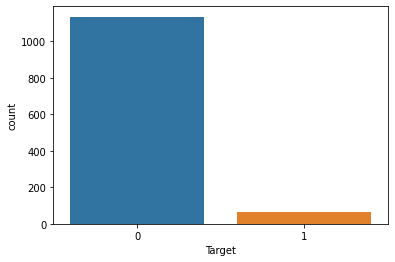

In [ ]:
ax = sns.countplot(x='Target', data=data)

In [ ]:
X = data.drop('Target', axis=1).values

In [ ]:
y = data.Target.values

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X_train, y_train = smt.fit_resample(X_train, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
param_grid = {'n_neighbors': np.arange(2, 30)}

In [ ]:
knn_CV = GridSearchCV(knn, param_grid, cv=5)

In [ ]:
knn_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=knn_CV.best_params_['n_neighbors'])

In [ ]:
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred = knn_final.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       340
           1       0.58      0.35      0.44        20

    accuracy                           0.95       360
   macro avg       0.77      0.67      0.71       360
weighted avg       0.94      0.95      0.94       360



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[335,   5],
       [ 13,   7]])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


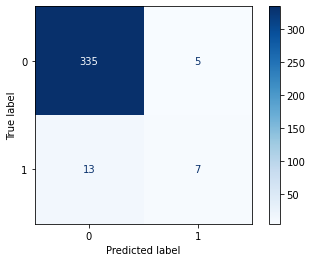

In [ ]:
plot_confusion_matrix(knn_final, X_test, y_test, cmap=plt.cm.Blues);

In [ ]:
res = knn_final.predict(data.drop('Target', axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
data_aux['Pred'] = res

In [ ]:
data_aux.head()

,ID,Depto,Estado,Gender,Management Level,Idade,TempoEmpresa,MesRef,HistFarmaciaTit,HistConsultaTitular,TipoCronica,Recorrencia,TargetProx,Pred
0,1,TI,MINAS GERAIS,M,Staff,46,269,2018-01-01,1,2,0,1,NÃO,0
1,1,TI,MINAS GERAIS,M,Staff,46,270,2018-02-01,0,1,0,1,NÃO,0
2,1,TI,MINAS GERAIS,M,Staff,46,271,2018-03-01,0,1,0,1,NÃO,0
3,1,TI,MINAS GERAIS,M,Staff,46,272,2018-04-01,0,1,0,1,NÃO,0
4,1,TI,MINAS GERAIS,M,Staff,46,273,2018-05-01,0,1,0,1,NÃO,0


In [ ]:
data_aux.Pred.sum()

41

In [ ]:
ausen_estado = data_aux.groupby('Estado')['Pred'].sum()

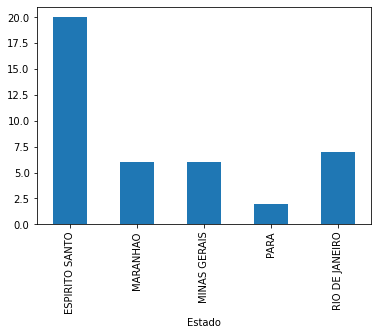

In [ ]:
ausen_estado.plot(kind='bar')

In [ ]:
ausen_depto = data_aux.groupby('Depto')['Pred'].sum()

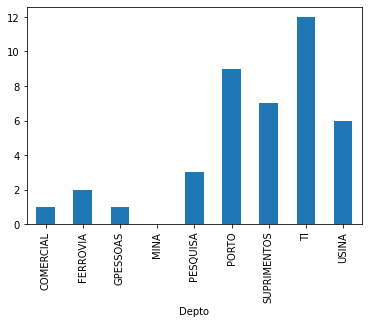

In [ ]:
ausen_depto.plot(kind='bar')